In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [65]:
class BanditProblem:
    def __init__(self, n, epsilon, initial_value=0):
        self.n = n
        self.epsilon = epsilon
        self.q_star = np.random.normal(0, 1, n)

        self.Q = np.full(n, initial_value)

        self.sum_of_rewards = np.zeros(n, dtype=np.float64)
        self.total_steps = np.zeros(n, dtype=np.float64)

    def step(self) -> float:
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.n)
        else:
            action = np.argmax(self.Q)


        reward = np.random.normal(self.q_star[action], 1)
        # print(f"action: {action}, reward: {reward}")
        self.sum_of_rewards[action] += reward
        self.total_steps[action] += 1

        self.Q = np.divide(self.sum_of_rewards,self.total_steps, out=np.zeros_like(self.Q, dtype=np.float64), where=self.total_steps!=0)

        return reward

In [66]:
all_rewards = []
for _ in tqdm(range(2000)):
    p = BanditProblem(10, 0.01)

    rewards = []
    # print(np.argmax(p.q_star), np.argmax(p.Q))
    for i in range(1000):
        # if i%100 == 0:
        # print(p.Q)
        rewards.append(p.step())
    # print(np.argmax(p.q_star), np.argmax(p.Q))
    all_rewards.append(rewards)

all_rewards = np.array(all_rewards)
average_rewards = np.mean(all_rewards, axis=0)

100%|██████████| 2000/2000 [00:08<00:00, 243.19it/s]


In [67]:
all_rewards2 = []
for _ in tqdm(range(2000)):
    p = BanditProblem(10, 0)

    rewards = []
    # print(np.argmax(p.q_star), np.argmax(p.Q))
    for i in range(1000):
        # if i%100 == 0:
        # print(p.Q)
        rewards.append(p.step())
    # print(np.argmax(p.q_star), np.argmax(p.Q))
    all_rewards2.append(rewards)

all_rewards2 = np.array(all_rewards2)
average_rewards2 = np.mean(all_rewards2, axis=0)

100%|██████████| 2000/2000 [00:08<00:00, 247.11it/s]


In [68]:
all_rewards3 = []
for _ in tqdm(range(2000)):
    p = BanditProblem(10, 0.1)

    rewards = []
    # print(np.argmax(p.q_star), np.argmax(p.Q))
    for i in range(1000):
        # if i%100 == 0:
        # print(p.Q)
        rewards.append(p.step())
    # print(np.argmax(p.q_star), np.argmax(p.Q))
    all_rewards3.append(rewards)

all_rewards3 = np.array(all_rewards3)
average_rewards3 = np.mean(all_rewards3, axis=0)

100%|██████████| 2000/2000 [00:08<00:00, 232.05it/s]


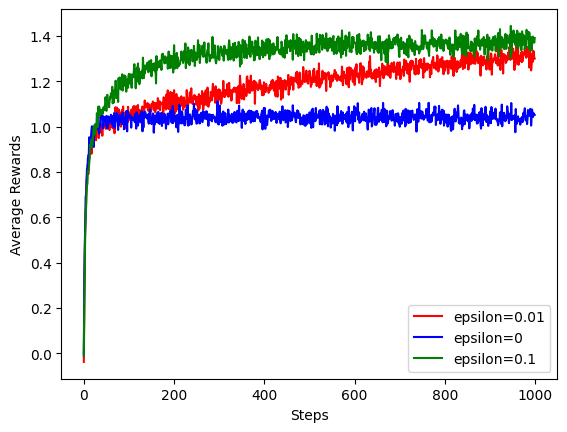

In [69]:
plt.plot(average_rewards, color='r', label='epsilon=0.01')
plt.plot(average_rewards2, color='b', label='epsilon=0')
plt.plot(average_rewards3, color='g', label='epsilon=0.1')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Rewards')
plt.show()